In [11]:
from aiatools import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from zipfile import ZipFile, BadZipFile

In [12]:
# reading the csv provided by Technovation
df = pd.read_csv("Technovation.csv")
df['Source code url']

0       https://s3.amazonaws.com/technovation-uploads-...
1                                                     NaN
2       https://s3.amazonaws.com/technovation-uploads-...
3                                                     NaN
4                                                     NaN
                              ...                        
3265                                                  NaN
3266                                                  NaN
3267    https://s3.amazonaws.com/technovation-uploads-...
3268                                                  NaN
3269    https://s3.amazonaws.com/technovation-uploads-...
Name: Source code url, Length: 3270, dtype: object

In [13]:
# This is to drop all of the rows that don't have app inventor projects in them.
first = df[df['Source code url'].isna() == False]

# resetting the index so we can see how many app inventor uploads there are.
first = first[['Source code url']].reset_index(drop=True)

# Just renaming the columns
first = first.rename(columns={'Source code url' : 'Source'})

# The first project was not valid, as it was a test entry by the Technovation team, so I excluded that.
first = first.iloc[1:, :]

first['Source'].get(3)

'https://s3.amazonaws.com/technovation-uploads-production/files/team_submission/source_code/17198/Civitas_.aia'

In [14]:
# In this cell, we want to isolate the rows that have app inventor projects that have the file type ".aia" because the other zip files are not analyzable with the aiatools package.
pattern = r"(\.aia)$"
second = first[first['Source'].str.contains(pattern, regex=True) == True].reset_index(drop=True)
second

/var/folders/pv/7_xg6qrx725ggnfrs542g8p40000gn/T/ipykernel_52946/2349235735.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  second = first[first['Source'].str.contains(pattern, regex=True) == True].reset_index(drop=True)


,Source
0,https://s3.amazonaws.com/technovation-uploads-...
1,https://s3.amazonaws.com/technovation-uploads-...
2,https://s3.amazonaws.com/technovation-uploads-...
3,https://s3.amazonaws.com/technovation-uploads-...
4,https://s3.amazonaws.com/technovation-uploads-...
...,...
868,https://s3.amazonaws.com/technovation-uploads-...
869,https://s3.amazonaws.com/technovation-uploads-...
870,https://s3.amazonaws.com/technovation-uploads-...
871,https://s3.amazonaws.com/technovation-uploads-...


In [15]:
# I want to automate the downloading for the files, so I don't have to download 880 files manually.

# DANGEROUS CODE BELOW: TO DOWNLOAD THE FILES, UNCOMMENT THE CODE BELOW AND RUN
# IMPORTANT: DO NOT RUN THIS CELL MULTIPLE TIMES.

# options = webdriver.ChromeOptions()
# download_directory = './aia_downloads'
# options.add_experimental_option("prefs", {
#     "download.default_directory": download_directory,
#     "download.prompt_for_download": False,
#     "download.directory_upgrade": True,
#     "safebrowsing.enabled": True
# })
# driver = webdriver.Chrome(options=options)

# urls = second['Source'].tolist()
# driver.get(urls[0])
# for i, url in enumerate(urls):
#     driver.get(url)

In [16]:
# Plan of Action:

# 1: Determine the total number of screens, do a graphical analysis of that; find the total per project and total overall. Max? Min? <5, 10+, 20+  

# 2: Then we can examine the total amount of blocks and blocks per screen, and do an analysis on that too.

# 3: Next we want to sort by the COMPONENTS by its complexity and do a general analysis of that. How many projects used which 'level' of Components?
#    The previous analysis separated the blocks using 2 measures: Sensor Components and Functionality.

# 4: We can then do a close analysis on the complexity of the components, possibly assign a 'Component Complexity Score' to each project.

# 5: Then we can do the same thing but with BLOCKS this time.

# 6: We can also then analyze extensions. How many projects used extensions? Of these projects, are there any 'storybook' projects? What is the comparison of overall score of the projects 
#    that used extensions and those that didn't?

# 7: Lastly, we can analyse the use of AI. Did projects use AI? How many did? What are the scores for that? How can we categorize the usage of AI with the other blocks? What is the comparison of 
#    overall project score compared to the ones that didn't use AI?

# 8: *Potential Analysis* - Develop a rubric and assign each assignment a 'Final Complexity Score', then use that to analyze the dynamic between complexity score and placement/actual scores
#    in the Technovation competition.

In [17]:
# Execution of Step 1: Analysis on Screens

folder_path = "./aia_downloads"
projects_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):

        try:
            projects_list.append(AIAFile(os.path.join(folder_path, filename)))
        except (KeyError, OSError, BadZipFile):
            pass

# We got a total of 870 successful reads on the projects
len(projects_list)

Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: youngandroidproject/remix_history
Ignoring file in AIA: META-INF/MANIFEST.MF
Ignoring file in AIA: META-INF/ANDROIDK.SF
Ignoring file in AIA: META-INF/ANDROIDK.RSA
Ignoring file in AIA: BundleConfig.pb
Ignoring file in AIA: base/assets/photo_2023-01-30_11-04-15.jpg
Ignoring file in AIA: base/assets/marker.svg
Ignoring file in AIA: base/assets/s.png
Ignoring file in AIA: base/assets/unnamed.png
Ignoring file in AIA:

871

In [18]:
# Data Cleaning

7505


Text(0.5, 1.0, 'Distribution of Screens per Project')

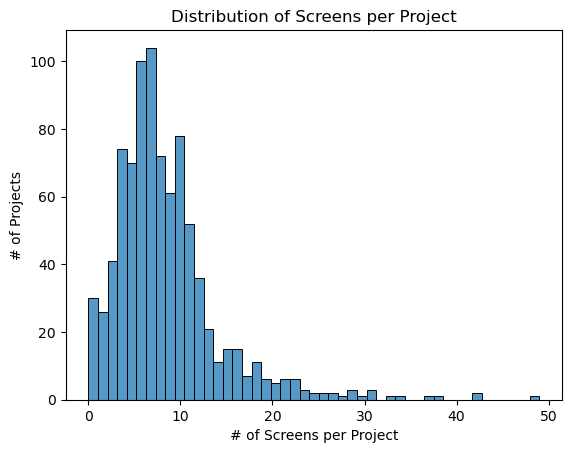

In [20]:
# after some investigation, these two projects both had no components in their entire project
# projects_list = [x for x in projects_list if not ('AvtoGold' in x.filename or 'FUM' in x.filename)]

# Finding out total number of screens out of 870 projects
total_screens = []
all_screens = []
project_screen_dict = {}
for project in projects_list:
    all_screens += project.screens
    total_screens.append(len(project.screens))
    project_screen_dict[re.search(r"([^\/]+)\.aia", project.filename).group(1)] = len(project.screens)
data = pd.DataFrame({'Project Name': project_screen_dict.keys(), 'Screen Count': project_screen_dict.values()})

print(sum(total_screens))

avg_screen_count = np.sum(total_screens) / len(total_screens)

median_screen_count = np.median(total_screens)

max_screen_count = max(data['Screen Count'])

min_screen_count = min(data[data['Screen Count'] != 0]['Screen Count'])

screen_distribution = data.groupby('Screen Count')[['Project Name']].agg('count').rename(columns={'Project Name' : 'Number of Projects'}).reset_index()

sns.histplot(data['Screen Count'])
plt.ylabel('# of Projects')
plt.xlabel('# of Screens per Project')
plt.title('Distribution of Screens per Project')

In [21]:
# Now we can check how many screens had no components are them / how many screens were unused.

project_screens_components = []

for project in projects_list:
    screens = project.screens
    for screen in screens:
        project_screens_components.append(screen.components)

# project_screens_components[0]

# From the code above, we can see that the first element in a screen list is just the screen itself. 
# Therefore, we will say that if the screen list has a length of 1, that means there are no components in that screen

mt_screens_dict = {}
num_projects_with_empty_screens = 0
for project in projects_list:
    screens = project.screens
    # Checks how many empty screens there are in the project.
    mt = 0
    for screen in screens:
        if len(screen.components) == 1:
            mt += 1
    if mt > 0:
        num_projects_with_empty_screens += 1
    mt_screens_dict[re.search(r"([^\/]+)\.aia", project.filename).group(1)] = mt

num_projects_with_empty_screens = len(mt_screens_dict)


# Create a dataframe to visualize the project to empty screens ratios.
p = {'project name': mt_screens_dict.keys(), 'Empty Screen Count': mt_screens_dict.values(), 'Project File': projects_list}
empty = pd.DataFrame(p)

total_empty_screens =  np.sum(empty['Empty Screen Count'])
empty

,project name,Empty Screen Count,Project File
0,Pikachu_Explorer,0,<aiatools.aia.AIAFile object at 0x168c7ded0>
1,PlusSimple__1_,0,<aiatools.aia.AIAFile object at 0x179ca0ed0>
2,vivo,0,<aiatools.aia.AIAFile object at 0x179c1ca50>
3,food_soul,0,<aiatools.aia.AIAFile object at 0x155997e50>
4,recycleables_Screen_checkpoint2,0,<aiatools.aia.AIAFile object at 0x1559f7a90>
...,...,...,...
866,TSL,0,<aiatools.aia.AIAFile object at 0x291bdbf50>
867,Save_Earth,0,<aiatools.aia.AIAFile object at 0x291e7fb90>
868,Time2Reduce,0,<aiatools.aia.AIAFile object at 0x29201ffd0>
869,Get_your_first_job,0,<aiatools.aia.AIAFile object at 0x292200dd0>


In [22]:
# Invalid Submissions (no screens)
invalid = []
for project in projects_list:
    if len(project.screens) == 0:
        invalid.append(project.filename)
        
# next we will see if there are any submissions that have no components.
for project in projects_list:
    no_components = True
    for screen in project.screens:
        # we set this = 1 because the screen itself is always included into the components list.
        if len(screen.components) > 1:
            no_components = False
    if no_components:
        if not project.filename in invalid:
            invalid.append(project.filename)
invalid
# There are 2.

['./aia_downloads/AvtoGold.aia', './aia_downloads/FUM.aia']

In [23]:
# The idea of Storybook project can be categorized as 20+ screens. We can check for the projects that have 20+ screens

story_books = data[data["Screen Count"] >= 20]
num_story_books = story_books.shape[0]
num_story_books

41

In [24]:
# Now lets combine all these into one dataframe
Combined_data = data.merge(right=empty, left_on='Project Name', right_on='project name')
Combined_data = Combined_data[['Project Name', 'Project File', 'Screen Count', 'Empty Screen Count']]
Combined_data['Storybook 20-29'] = ((data["Screen Count"] >= 20) & (data["Screen Count"] < 30))
Combined_data['Storybook 30-39'] = ((data["Screen Count"] >= 30) & (data["Screen Count"] < 40))
Combined_data['Storybook 40-50'] = ((data["Screen Count"] >= 40) & (data["Screen Count"] <= 50))
screen_data = (avg_screen_count, max_screen_count, min_screen_count)
Combined_data
# First step done

,Project Name,Project File,Screen Count,Empty Screen Count,Storybook 20-29,Storybook 30-39,Storybook 40-50
0,Pikachu_Explorer,<aiatools.aia.AIAFile object at 0x168c7ded0>,4,0,False,False,False
1,PlusSimple__1_,<aiatools.aia.AIAFile object at 0x179ca0ed0>,6,0,False,False,False
2,vivo,<aiatools.aia.AIAFile object at 0x179c1ca50>,3,0,False,False,False
3,food_soul,<aiatools.aia.AIAFile object at 0x155997e50>,9,0,False,False,False
4,recycleables_Screen_checkpoint2,<aiatools.aia.AIAFile object at 0x1559f7a90>,5,0,False,False,False
...,...,...,...,...,...,...,...
866,TSL,<aiatools.aia.AIAFile object at 0x291bdbf50>,22,0,True,False,False
867,Save_Earth,<aiatools.aia.AIAFile object at 0x291e7fb90>,6,0,False,False,False
868,Time2Reduce,<aiatools.aia.AIAFile object at 0x29201ffd0>,8,0,False,False,False
869,Get_your_first_job,<aiatools.aia.AIAFile object at 0x292200dd0>,9,0,False,False,False


Text(0.5, 1.0, 'All Possible Storybook Projects')

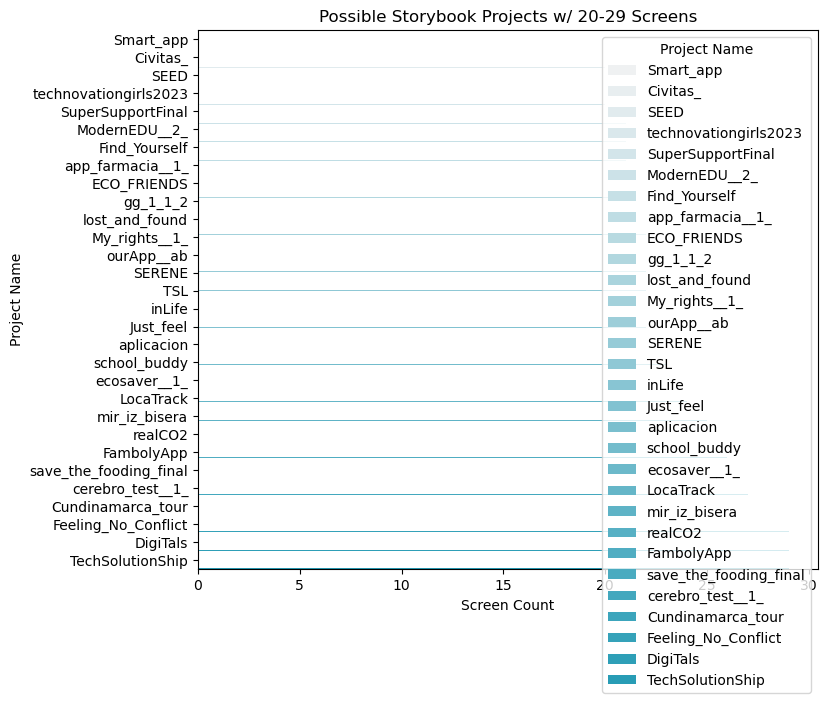

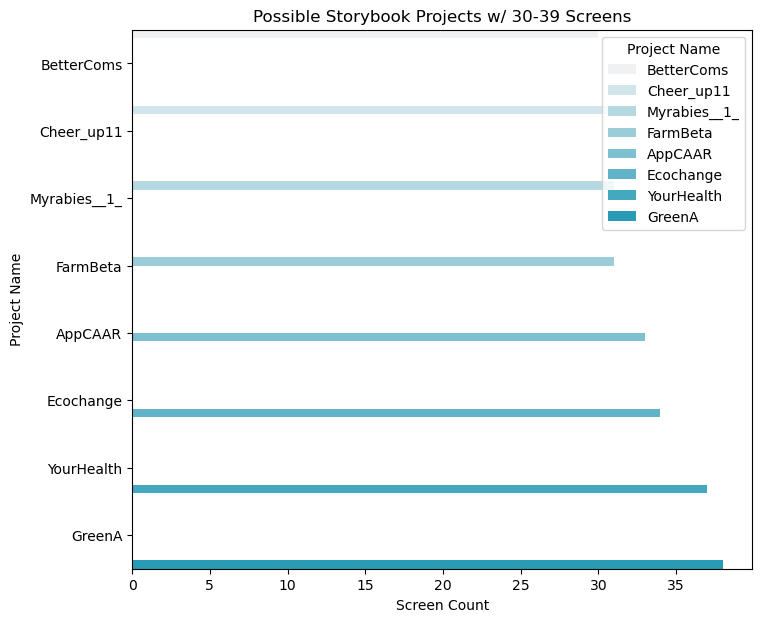

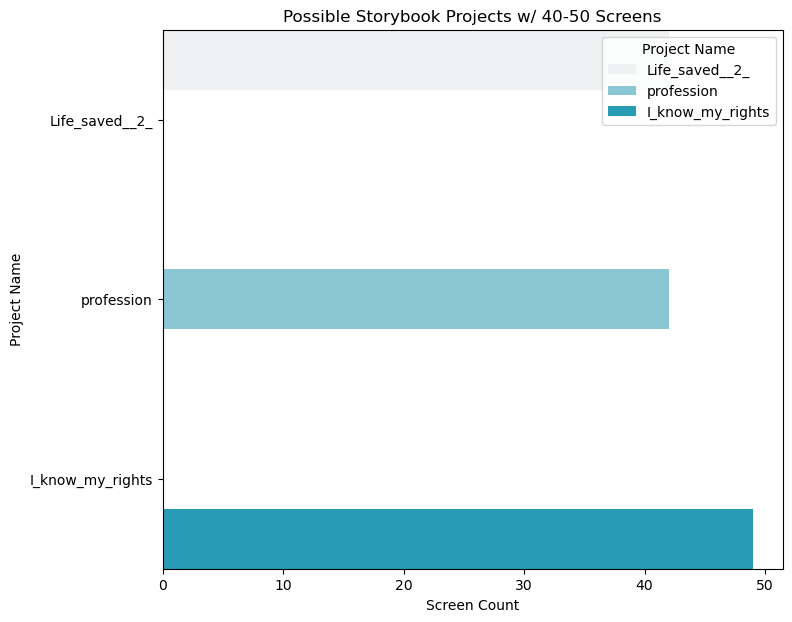

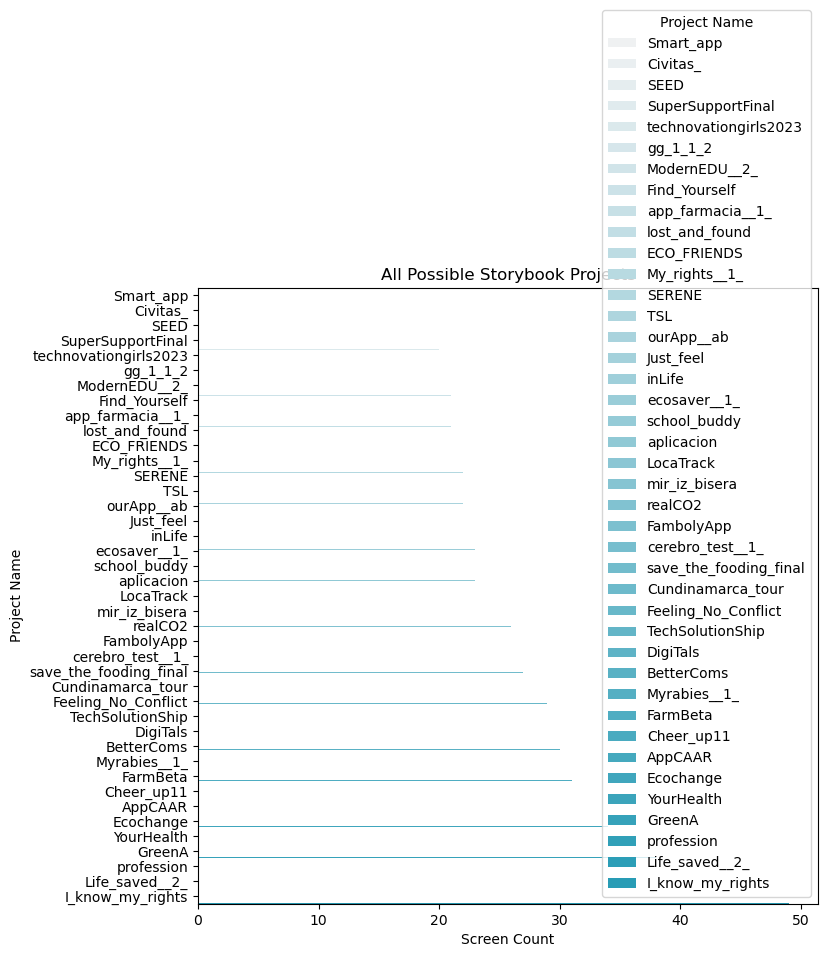

In [26]:
# Story Book Projects Visualizations

num_20_to_29_storybooks = len(Combined_data[Combined_data['Storybook 20-29'] == True])
num_30_to_39_storybooks = len(Combined_data[Combined_data['Storybook 30-39'] == True])
num_40_plus_storybooks = len(Combined_data[Combined_data['Storybook 40-50'] == True])
projects_20_to_29 = Combined_data[Combined_data['Storybook 20-29'] == True]
projects_30_to_39 = Combined_data[Combined_data['Storybook 30-39'] == True]
projects_40_to_50 = Combined_data[Combined_data['Storybook 40-50'] == True]

plt.figure(figsize=(8, 7))
sns.barplot(data=projects_20_to_29.sort_values('Screen Count', ascending=True), x='Screen Count', y='Project Name', width = 1, hue='Project Name', palette='light:#10ABCD')
plt.title('Possible Storybook Projects w/ 20-29 Screens')

plt.figure(figsize=(8, 7))
sns.barplot(data=projects_30_to_39.sort_values('Screen Count', ascending=True), x='Screen Count', y='Project Name', width = 1, hue='Project Name', palette='light:#10ABCD')
plt.title('Possible Storybook Projects w/ 30-39 Screens')

plt.figure(figsize=(8, 7))
sns.barplot(data=projects_40_to_50.sort_values('Screen Count', ascending=True), x='Screen Count', y='Project Name', width = 1, hue='Project Name', palette='light:#10ABCD')
plt.title('Possible Storybook Projects w/ 40-50 Screens')

plt.figure(figsize=(8, 8))
sns.barplot(data=story_books.sort_values('Screen Count', ascending=True), x='Screen Count', y='Project Name', width = 1, hue='Project Name', palette='light:#10ABCD')
plt.title('All Possible Storybook Projects')

In [28]:
# Analysis on components

total_components_list = []
for project in projects_list:
    num = 0
    for screen in project.screens:
        # We subtract one here because the first component is just the screen itself.
        num += len(screen.components) - 1
    total_components_list.append(num)

# We want to record this onto out dataset
Combined_data['Components Count'] = total_components_list


project_components = {}
for project in projects_list:
    screens_dict = {}
    for screen in project.screens:
        screens_dict[screen] = screen.components
    project_components[re.search(r"([^\\]+)\.aia", project.filename).group(1)] = screens_dict
    
Average_num_components_per_project = np.mean(total_components_list)
print(sum(total_components_list))
# Note: This average includes the screens with no components in there.
Average_num_components_per_screen = sum(total_components_list) / sum(total_screens)
Average_num_components_per_screen

106527


14.194137241838774

In [16]:
# For this average, we need to exclude the screens without any components, or else it might skew the distribution

non_empty_screens_list = []
for project in projects_list:
    for screen in project.screens:
        if len(screen.components) > 1:
            non_empty_screens_list.append(screen.components)
# we have to subtract 1 here because the screen is included as a component itself.
non_empty_components = [len(screen) - 1 for screen in non_empty_screens_list]

Average_num_components_per_screen = sum(non_empty_components) / len(non_empty_screens_list)
Average_num_components_per_screen

14.556485929993137

In [72]:
# Complexity categorization for components

lv_1_components = ['Image', 'Label', 'TextBox', 'Button']

lv_2_components = ['Camcorder','Camera','VideoPlayer','Translator','SoundRecorder',
        'Player','Sound','ContactPicker','EmailPicker','PhoneNumberPicker',
        'PhoneCall','Texting','WebViewer','Pedometer','Clock','LocationSensor',
        'BarcodeScanner','Variable','TinyDB','Checkbox','ListPicker','ListView',
        'Notifier','PasswordTextBox','Slider','Spinner','Switch','HorizontalArrangement',
        'VerticalArrangement','TableArrangement','HorizontalScrollArrangement','VerticalScrollArrangement']

lv_3_components = ['ImagePicker','SpeechRecognizer','TextToSpeech','Sharing',
        'Twitter','ActivityStarter','Maps','AccelerometerSensor',
        'GyroscopeSensor','ProximitySensor','NearField','OrientationSensor','TimePicker']

lv_4_components = ['Web','Bluetooth Client','BluetoothServer',
        'Chart', 'ChartData2D','Serial','MagneticFieldSensor',
        'Barometer','Hygrometer','LightSensor','Thermometer',
        'Spreadsheet','CloudDB','FirebaseDB','BluetoothLE']

lv_5_components = ['PersonalAudioClassifier', 'PersonalImageClassifier', 'LookExtension']


def level_sorting_components_func(level, project):
    """
    Returns a list of the specific components of a given project in the given level of complexity.

    parameters:
        level - list of components in a level.
        project - AIAFile of a project.
    """
    
    list = []
    for screen in project.screens:
        for component in screen.components:
            if component.type() in level:
                list.append(component)
    return list

    
level_1_sorting_components = [len(level_sorting_components_func(lv_1_components, project)) for project in projects_list]

level_2_sorting_components = [len(level_sorting_components_func(lv_2_components, project)) for project in projects_list]

level_3_sorting_components = [len(level_sorting_components_func(lv_3_components, project)) for project in projects_list]

level_4_sorting_components = [len(level_sorting_components_func(lv_4_components, project)) for project in projects_list]

level_5_sorting_components = [len(level_sorting_components_func(lv_5_components, project)) for project in projects_list]

Combined_data['Level 1 Components'] = level_1_sorting_components
Combined_data['Level 2 Components'] = level_2_sorting_components
Combined_data['Level 3 Components'] = level_3_sorting_components
Combined_data['Level 4 Components'] = level_4_sorting_components
Combined_data['AI'] = level_5_sorting_components

# We have to check for Extensions separately

def find_extensions(project):
    """
    Returns a list of the components that are extensions.

    parameters:
        level - list of components in a level.
        project - AIAFile of a project.
    """
    list = []
    for screen in project.screens:
        for extension in screen.components(external == True):
            list.append(extension)
    return list

Combined_data['Extensions'] = [len(find_extensions(project)) for project in projects_list]


def condition(column):
    if column >= 1:
        return 1.5
    else:
        return 1

# Now let's look at the complexity score of the components

Combined_data['Level 1 Component Score'] = Combined_data['Level 1 Components'] * 1 * 0.05
Combined_data['Level 2 Component Score'] = Combined_data['Level 2 Components'] * 2 * 0.15
Combined_data['Level 3 Component Score'] = Combined_data['Level 3 Components'] * 3 * 0.3
Combined_data['Level 4 Component Score'] = Combined_data['Level 4 Components'] * 4 * 0.5
Combined_data['AI Score'] = Combined_data['AI'].apply(condition)
Combined_data['Extensions Score'] = Combined_data['Extensions'].apply(condition)

# Changed Rubric to 'Whether or not the projects used AI or Extensions' instead of 'how many'.
Combined_data['Extensions'] = Combined_data['Extensions'] > 0
Combined_data['AI'] = Combined_data['AI'] > 0


Combined_data['Component Complexity Score'] = np.round(
                                              (((Combined_data['Level 1 Component Score'] +
                                              Combined_data['Level 2 Component Score'] +
                                              Combined_data['Level 3 Component Score'] +
                                              Combined_data['Level 4 Component Score']) *
                                              Combined_data['AI Score']) *
                                              Combined_data['Extensions Score'])
                                              )



max_component_score = max(Combined_data['Component Complexity Score'])

min_component_score = min(Combined_data['Component Complexity Score'])


In [73]:
# Table Visualization of the # of Components and the Component Complexity Score.

Combined_data[['Project Name', 'Level 1 Components', 'Level 2 Components', 'Level 3 Components', 'Level 4 Components', 'AI', 'Extensions', 'Component Complexity Score']].sort_values('Component Complexity Score', ascending=False).head(10)

,Project Name,Level 1 Components,Level 2 Components,Level 3 Components,Level 4 Components,AI,Extensions,Component Complexity Score
840,app_farmacia__1_,246,839,0,0,False,True,396.0
574,Myrabies__1_,634,302,8,2,True,True,300.0
451,SEED,118,324,0,10,True,True,277.0
298,TalkingCare__1_,871,394,0,1,False,True,246.0
456,SERENE,956,291,6,6,False,True,229.0
19,PRA,233,184,5,40,False,True,227.0
865,TSL,696,282,7,3,False,True,198.0
697,Life_saved__2_,565,477,12,0,False,False,182.0
432,Vision_2023Demo,232,223,7,14,False,True,169.0
518,BrainBoost_App_,680,226,0,3,False,True,162.0


Text(0.5, 1.0, '# of Components vs Component Complexity Score')

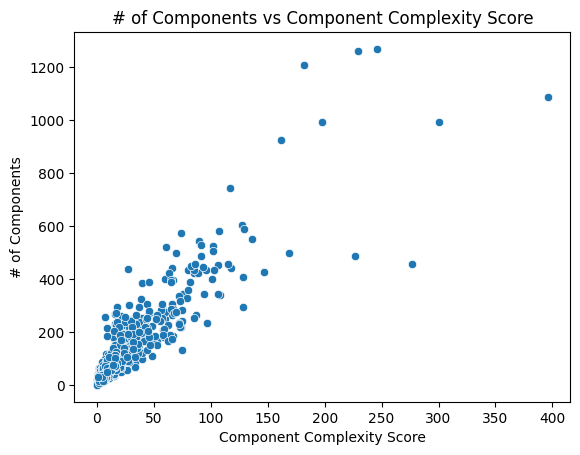

In [74]:
sns.scatterplot(data=Combined_data, x='Component Complexity Score', y='Components Count')
plt.ylabel('# of Components')
plt.xlabel('Component Complexity Score')
plt.title('# of Components vs Component Complexity Score')

Text(0.5, 1.0, 'Level 1 Components vs Component Complexity Score')

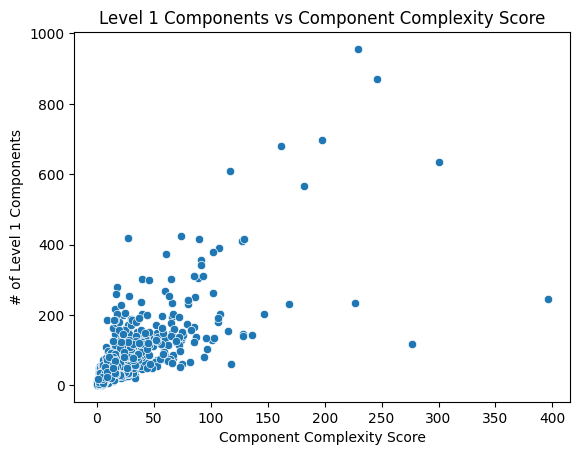

In [75]:
sns.scatterplot(data=Combined_data[Combined_data['Level 1 Components'] > 0], x='Component Complexity Score', y='Level 1 Components')
plt.ylabel('# of Level 1 Components')
plt.xlabel('Component Complexity Score')
plt.title('Level 1 Components vs Component Complexity Score')

Text(0.5, 1.0, 'Level 2 Components vs Component Complexity Score')

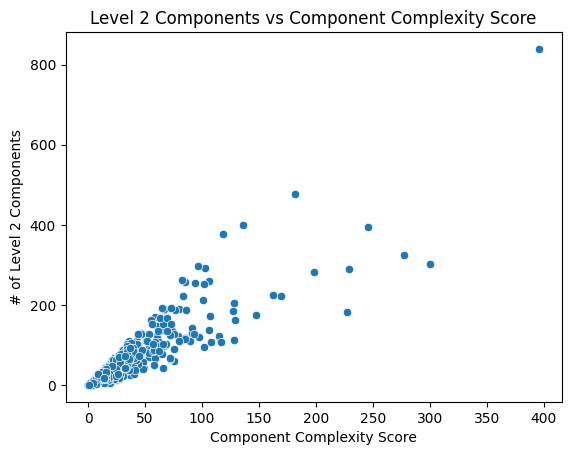

In [76]:
sns.scatterplot(data=Combined_data[Combined_data['Level 2 Components'] > 0], x='Component Complexity Score', y='Level 2 Components')
plt.ylabel('# of Level 2 Components')
plt.xlabel('Component Complexity Score')
plt.title('Level 2 Components vs Component Complexity Score')

Text(0.5, 1.0, 'Level 3 Components vs Component Complexity Score')

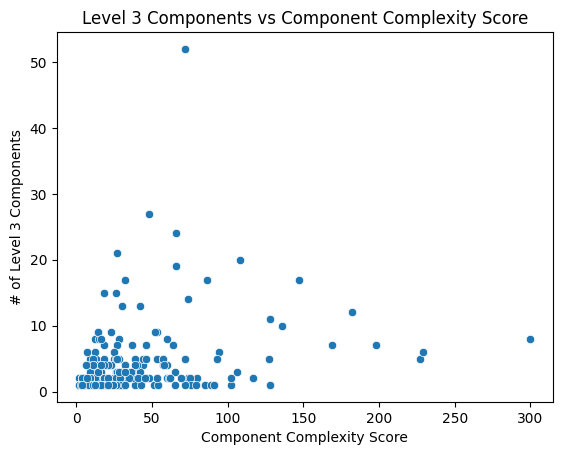

In [77]:
sns.scatterplot(data=Combined_data[Combined_data['Level 3 Components'] > 0], x='Component Complexity Score', y='Level 3 Components')
plt.ylabel('# of Level 3 Components')
plt.xlabel('Component Complexity Score')
plt.title('Level 3 Components vs Component Complexity Score')

Text(0.5, 1.0, 'Level 4 Components vs Component Complexity Score')

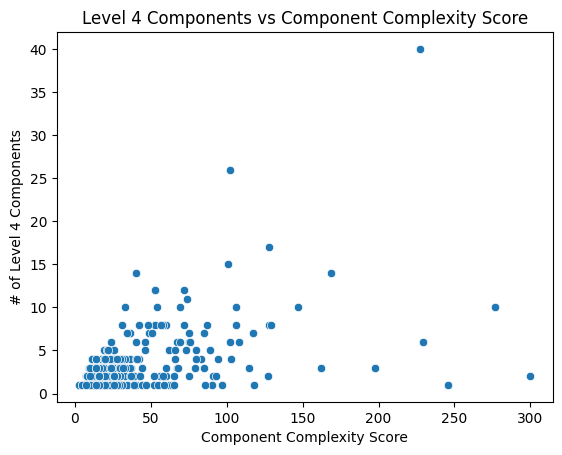

In [78]:
sns.scatterplot(data=Combined_data[Combined_data['Level 4 Components'] > 0], x='Component Complexity Score', y='Level 4 Components')
plt.ylabel('# of Level 4 Components')
plt.xlabel('Component Complexity Score')
plt.title('Level 4 Components vs Component Complexity Score')

Text(0.5, 1.0, 'AI vs Component Complexity Score')

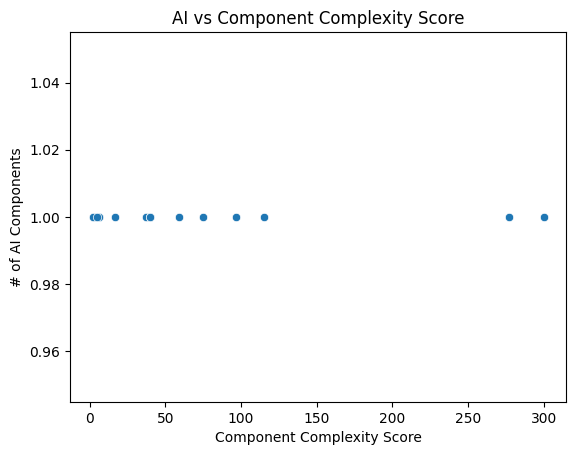

In [79]:
sns.scatterplot(data=Combined_data[Combined_data['AI'] > 0], x='Component Complexity Score', y='AI')
plt.ylabel('# of AI Components')
plt.xlabel('Component Complexity Score')
plt.title('AI vs Component Complexity Score')

Text(0.5, 1.0, '# of Extensions vs Component Complexity Score')

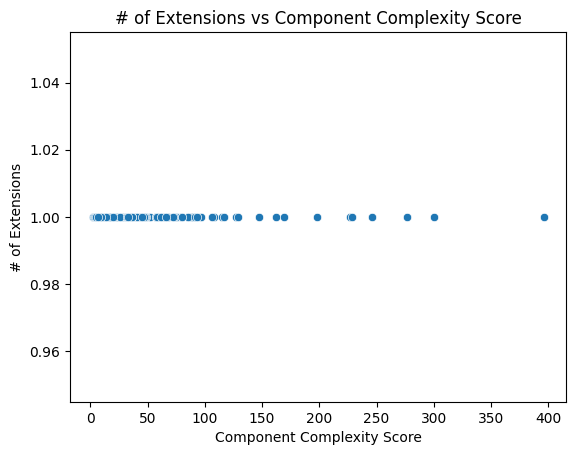

In [80]:
sns.scatterplot(data=Combined_data[Combined_data['Extensions'] > 0], x='Component Complexity Score', y='Extensions')
plt.ylabel('# of Extensions')
plt.xlabel('Component Complexity Score')
plt.title('# of Extensions vs Component Complexity Score')

Text(0.5, 1.0, 'Correlation between Different Levels of Component Scores and Overall Component Complexity Score')

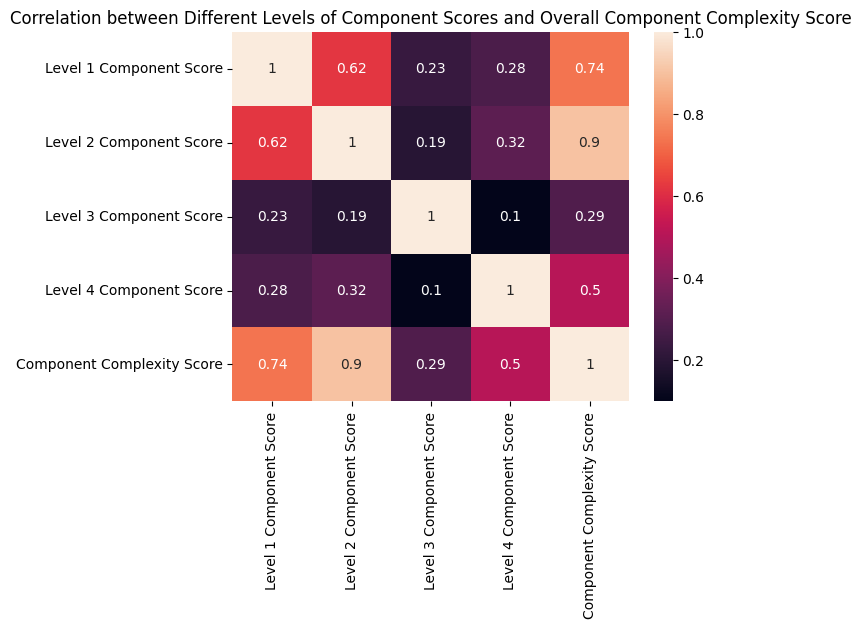

In [81]:
# Heatmap of Component Correlations

sns.heatmap(data=Combined_data[['Level 1 Component Score', 'Level 2 Component Score', 'Level 3 Component Score', 'Level 4 Component Score', 'Component Complexity Score']].corr(), annot=True)
plt.title('Correlation between Different Levels of Component Scores and Overall Component Complexity Score')

In [82]:
# More incomplete/invalid submissions.

Combined_data[Combined_data['Components Count'] == 1]
Combined_data[Combined_data['Components Count'] == 1]

# Use the code below to see that the single components in these projects are just labels or a webviewer that sends the user to a website. (num is from 0 - 4, specifying each project)
# num = 0
# Combined_data[Combined_data['Components Count'] == 1]['Project File'].values[num].screens[0].components

,Project Name,Project File,Screen Count,Empty Screen Count,Storybook 20-29,Storybook 30-39,Storybook 40-50,Components Count,Level 1 Components,Level 2 Components,...,Level 1 Component Score,Level 2 Component Score,Level 3 Component Score,Level 4 Component Score,AI Score,Extensions Score,Component Complexity Score,Blocks Count,Blocks,Average Blocks Per Screen
96,Mindiser_copy,<aiatools.aia.AIAFile object at 0x154dc9b20>,1,0,False,False,False,1,1,0,...,0.05,0.0,0.0,0.0,1.0,1.0,0.0,0,[],0
376,Safecheck,<aiatools.aia.AIAFile object at 0x169884550>,1,0,False,False,False,1,0,1,...,0.00,0.3,0.0,0.0,1.0,1.0,0.0,0,[],0
405,DREAM_GIRLS,<aiatools.aia.AIAFile object at 0x16a7608b0>,1,0,False,False,False,1,1,0,...,0.05,0.0,0.0,0.0,1.0,1.0,0.0,0,[],0
632,DARK__9_,<aiatools.aia.AIAFile object at 0x29511e1f0>,1,0,False,False,False,1,1,0,...,0.05,0.0,0.0,0.0,1.0,1.0,0.0,37,"[global_declaration, component_set_get, compon...",37
780,GENIUS,<aiatools.aia.AIAFile object at 0x29b649b20>,1,0,False,False,False,1,0,1,...,0.00,0.3,0.0,0.0,1.0,1.0,0.0,3,"[component_event, component_set_get, text]",3


In [83]:
# Now we can see some statistics.

# How many projects used which level of block?
projects_lv1 = Combined_data[Combined_data['Level 1 Components'] > 0].shape[0]
projects_lv2 = Combined_data[Combined_data['Level 2 Components'] > 0].shape[0]
projects_lv3 = Combined_data[Combined_data['Level 3 Components'] > 0].shape[0]
projects_lv4 = Combined_data[Combined_data['Level 4 Components'] > 0].shape[0]

# How many projects used AI?
projects_AI = Combined_data[Combined_data['AI'] > 0].shape[0]

# How many projects used extensions?
projects_ext = Combined_data[Combined_data['Extensions'] > 0].shape[0]

# How many projects used extensions but were storybook style?
project_ext_storybook_20 = len(Combined_data[(Combined_data['Storybook 20-29'] == True) & (Combined_data['Extensions'] > 0)])
project_ext_storybook_30 = len(Combined_data[(Combined_data['Storybook 30-39'] == True) & (Combined_data['Extensions'] > 0)])
project_ext_storybook_40 = len(Combined_data[(Combined_data['Storybook 40-50'] == True) & (Combined_data['Extensions'] > 0)])

project_ext_storybook = project_ext_storybook_20 + project_ext_storybook_30 + project_ext_storybook_40
project_ext_storybook

16

In [31]:
# Analysis on Blocks
from project_blocks import *


# How many total blocks are in this project?
blocks_count = []
all_blocks = []
blocks_by_project = []
for project in projects_list:
    blocks_count.append(project.blocks().count())
    blocks_by_project.append([block.type for block in project.blocks])
    for block in project.blocks:
        all_blocks.append(block.type)

print(sum(blocks_count))

Combined_data['Blocks Count'] = blocks_count
Combined_data['Blocks'] = blocks_by_project

# Here, we have to exclude the project named 'Avto'. Avto is the project with nothing, so I can't divide 0 by 0 screens. 
average_num_blocks_per_screen = []
for project in projects_list:
    if re.search(r"([^\/]+)\.aia", project.filename).group(1) != 'Avto':
        average_num_blocks_per_screen.append(np.round(mean_blocks_per_screen(project.screens)).astype('int'))
    
Combined_data['Average Blocks Per Screen'] = average_num_blocks_per_screen

max_blocks_count = max(blocks_count)
min_blocks_count = min(blocks_count)
median_blocks_count = np.median(blocks_count)
average_num_of_blocks_total = sum(blocks_count) / sum(total_screens)


blocks_series = pd.Series(all_blocks)
unique_blocks = pd.Series(all_blocks).unique()

if_statements = blocks_series.str.contains('if')
unique_ifs = blocks_series.to_frame()[blocks_series.str.contains('if')].loc[:, 0].unique()

dictionaries = blocks_series.str.contains('dictionaries')
unique_dicts = blocks_series.to_frame()[blocks_series.str.contains('dictionaries')].loc[:, 0].unique()

lists = blocks_series.str.contains('list')
unique_lists = blocks_series.to_frame()[blocks_series.str.contains('list')].loc[:, 0].unique()


decs = blocks_series.str.contains('declaration')
unique_decs = blocks_series.to_frame()[blocks_series.str.contains('declaration')].loc[:, 0].unique()

forloops = blocks_series.str.contains('for')
unique_forloops = blocks_series.to_frame()[blocks_series.str.contains('for')].loc[:, 0].unique()

procedures = blocks_series.str.contains('procedure')
unique_procedures = blocks_series.to_frame()[blocks_series.str.contains('procedures')].loc[:, 0].unique()

component_blocks = blocks_series.str.contains('component')
unique_component_blocks = blocks_series.to_frame()[blocks_series.str.contains('component')].loc[:, 0].unique()

lv_1_blocks = ['controls_openAnotherScreen', 'lexical_variable_get', 
               'lexical_variable_set', 'controls_openAnotherScreenWithStartValue', 
               'controls_closeApplication', 'controls_closeScreen', 'controls_getStartValue',
              'controls_getPlainStartText', 'controls_closeScreenWithValue', 
               'controls_closeScreenWithPlainText', 'controls_send_to_block', 'component_set_get']

lv_2_blocks = ['local_declaration_statement', 'global_declaration',
       'local_declaration_expression', 'controls_if', 'component_event', 
               'component_component_block', 'component_method']

lv_3_blocks = ['lists_is_in', 'lists_create_with', 'lists_pick_random_item',
       'lists_add_items', 'lists_remove_item', 'lists_position_in',
       'lists_length', 'lists_select_item', 'lists_from_csv_table',
       'lists_is_empty', 'lists_reverse', 'lists_sort',
       'lists_from_csv_row', 'lists_lookup_in_pairs', 'math_on_list',
       'lists_to_csv_table', 'lists_replace_item', 'lists_is_list',
       'lists_join_with_separator', 'lists_to_csv_row', 'lists_copy',
       'lists_maximum_value', 'lists_map', 'lists_insert_item',
       'lists_append_list', 'controls_forEach', 'controls_forRange',
       'controls_for_each_dict', 'controls_while']

lv_4_blocks = ['dictionaries_create_with', 'dictionaries_lookup',
       'dictionaries_set_pair', 'dictionaries_is_key_in',
       'dictionaries_copy', 'dictionaries_recursive_set',
       'dictionaries_recursive_lookup', 'dictionaries_is_dict',
       'dictionaries_getters', 'dictionaries_delete_pair',
       'dictionaries_length', 'dictionaries_get_values',
       'dictionaries_combine_dicts', 'procedures_callnoreturn', 'procedures_defnoreturn',
       'procedures_defreturn', 'procedures_callreturn', 'controls_do_then_return']

def level_sorting_blocks_func(level, project):
    """
    Returns a list of the specific components of a given project in the given level of complexity.

    parameters:
        level - list of components in a level.
        project - AIAFile of a project.
    """
    
    list = []
    for block in project.blocks():
        if block.type in level:
            list.append(block)
    return list

level_1_sorting_blocks = [len(level_sorting_blocks_func(lv_1_blocks, project)) for project in projects_list]

level_2_sorting_blocks = [len(level_sorting_blocks_func(lv_2_blocks, project)) for project in projects_list]

level_3_sorting_blocks = [len(level_sorting_blocks_func(lv_3_blocks, project)) for project in projects_list]

level_4_sorting_blocks = [len(level_sorting_blocks_func(lv_4_blocks, project)) for project in projects_list]

Combined_data['Level 1 Blocks'] = level_1_sorting_blocks
Combined_data['Level 2 Blocks'] = level_2_sorting_blocks
Combined_data['Level 3 Blocks'] = level_3_sorting_blocks
Combined_data['Level 4 Blocks'] = level_4_sorting_blocks

Combined_data['Level 1 Block Score'] = Combined_data['Level 1 Blocks'] * 1 * 0.05
Combined_data['Level 2 Block Score'] = Combined_data['Level 2 Blocks'] * 2 * 0.15
Combined_data['Level 3 Block Score'] = Combined_data['Level 3 Blocks'] * 3 * 0.3
Combined_data['Level 4 Block Score'] = Combined_data['Level 4 Blocks'] * 4 * 0.5

Combined_data['Block Complexity Score'] = np.round(
                                              Combined_data['Level 1 Block Score'] +
                                              Combined_data['Level 2 Block Score'] +
                                              Combined_data['Level 3 Block Score'] +
                                              Combined_data['Level 4 Block Score']
                                              )

206237


/Users/davidyu/Desktop/Technovation_analysis/project_blocks.py:125: RuntimeWarning: Mean of empty slice
  return np.nanmean(project_blocks_per_screen(project))
/var/folders/pv/7_xg6qrx725ggnfrs542g8p40000gn/T/ipykernel_52946/1253364907.py:24: RuntimeWarning: invalid value encountered in cast
  average_num_blocks_per_screen.append(np.round(mean_blocks_per_screen(project.screens)).astype('int'))


<Axes: xlabel='Project Name', ylabel='Blocks Count'>

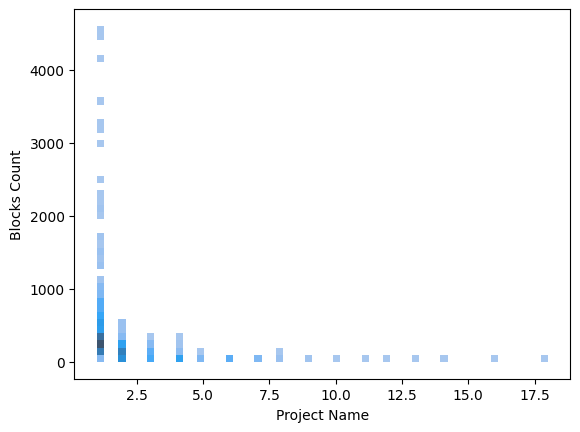

In [42]:
# Visualizations for blocks

block_visual = Combined_data.groupby('Blocks Count')[['Project Name']].agg('count').reset_index()

sns.histplot(data=block_visual, y='Blocks Count', x = 'Project Name')

In [94]:
# Now we can calculate the overall complexity score.
# We average them because the Block Score and Component Scores should have the same weight of 0.5.
Combined_data['Overall Complexity Score'] = (Combined_data['Block Complexity Score'] + Combined_data['Component Complexity Score']) / 2
Combined_data[['Project Name', 'Overall Complexity Score']].sort_values('Overall Complexity Score', ascending=False)

,Project Name,Overall Complexity Score
432,Vision_2023Demo,723.5
19,PRA,539.5
230,GirlsCerebritos,337.0
73,CareerQuiz_1,298.0
352,Flash_Back,296.5
...,...,...
780,GENIUS,0.0
376,Safecheck,0.0
96,Mindiser_copy,0.0
178,AvtoGold,0.0


In [97]:
# Blocks Table
Combined_data[['Project Name', 'Blocks Count', 'Level 1 Blocks', 'Level 2 Blocks', 'Level 3 Blocks', 'Level 4 Blocks', 'Block Complexity Score']].sort_values('Block Complexity Score', ascending=False).head(10)

,Project Name,Blocks Count,Level 1 Blocks,Level 2 Blocks,Level 3 Blocks,Level 4 Blocks,Block Complexity Score
432,Vision_2023Demo,4179,1230,618,244,406,1278.0
19,PRA,4453,1267,873,376,94,852.0
230,GirlsCerebritos,1753,518,187,62,231,600.0
73,CareerQuiz_1,3299,1004,293,146,130,530.0
352,Flash_Back,4601,1718,715,134,48,517.0
187,index,979,230,266,40,129,385.0
762,freemind,2496,998,431,23,86,372.0
792,MASH,2322,952,314,0,111,364.0
7,LIXIA1,1594,595,259,149,52,346.0
452,FRIEND_FINDER_FINISH,2099,740,414,168,16,344.0
